# Srinidhi Bharadwaj Kalgundi Srinivas
# A59010584

Quiz 1:
The goal of this problem is to segment the “cheetah” image into its two components, cheetah (foreground) and grass (background).

# a)
Question: Using the training data in TrainingSamplesDCT 8.mat, what are reasonable estimates for the prior probabilities?

Solution: Calculate the total number of foreground and background samples in the training set and calculate the prior foreground probability as a percentage of foreground samples with respect to total number of samples and calculate the prior background probability as percentage of background samples with respect to total number of samples.

## Calculated prior probabilites are:
### $P_Y$(Cheetah) is 0.1919
### $P_Y$(Grass) is 0.8081

### Matlab code snippet:

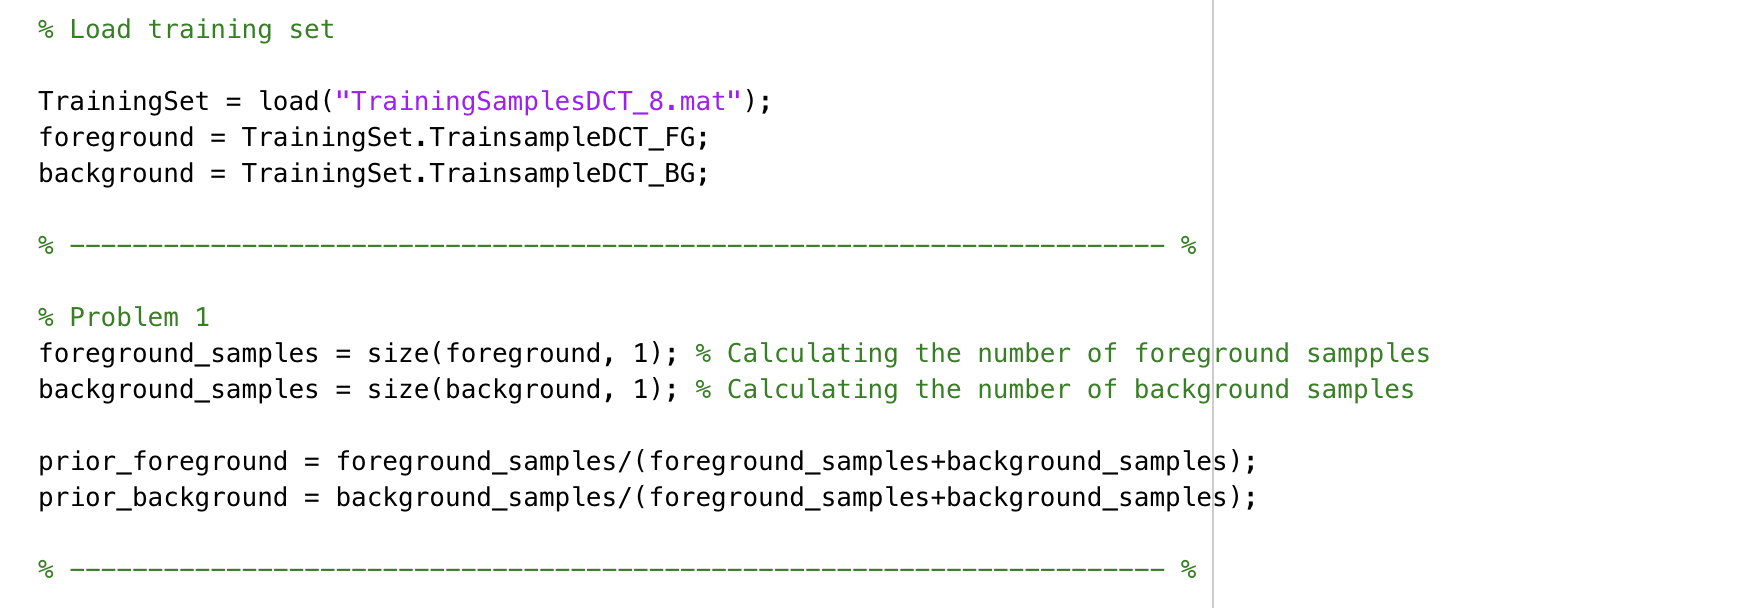


<div style="page-break-after: always;"></div>

# b)
Question: using the training data in TrainingSamplesDCT 8.mat, compute and plot the index histograms $P_{X|Y}$(x|cheetah) and $P_{X|Y}$(x|grass).

Solution: For both foreground and background samples, loop through the respective samples and calculating the index of the second highest value and storing it in a vector for plotting histogram. This is achieved by sorting the foreground(absolute value) training images and picking the second index of the second highest value. "Histogram" function of MATLAB is used to plot the histogram which is then normalized.

Images in the next page.

<div style="page-break-after: always;"></div>

### Histogram of $P_{X|Y}$(x|cheetah):
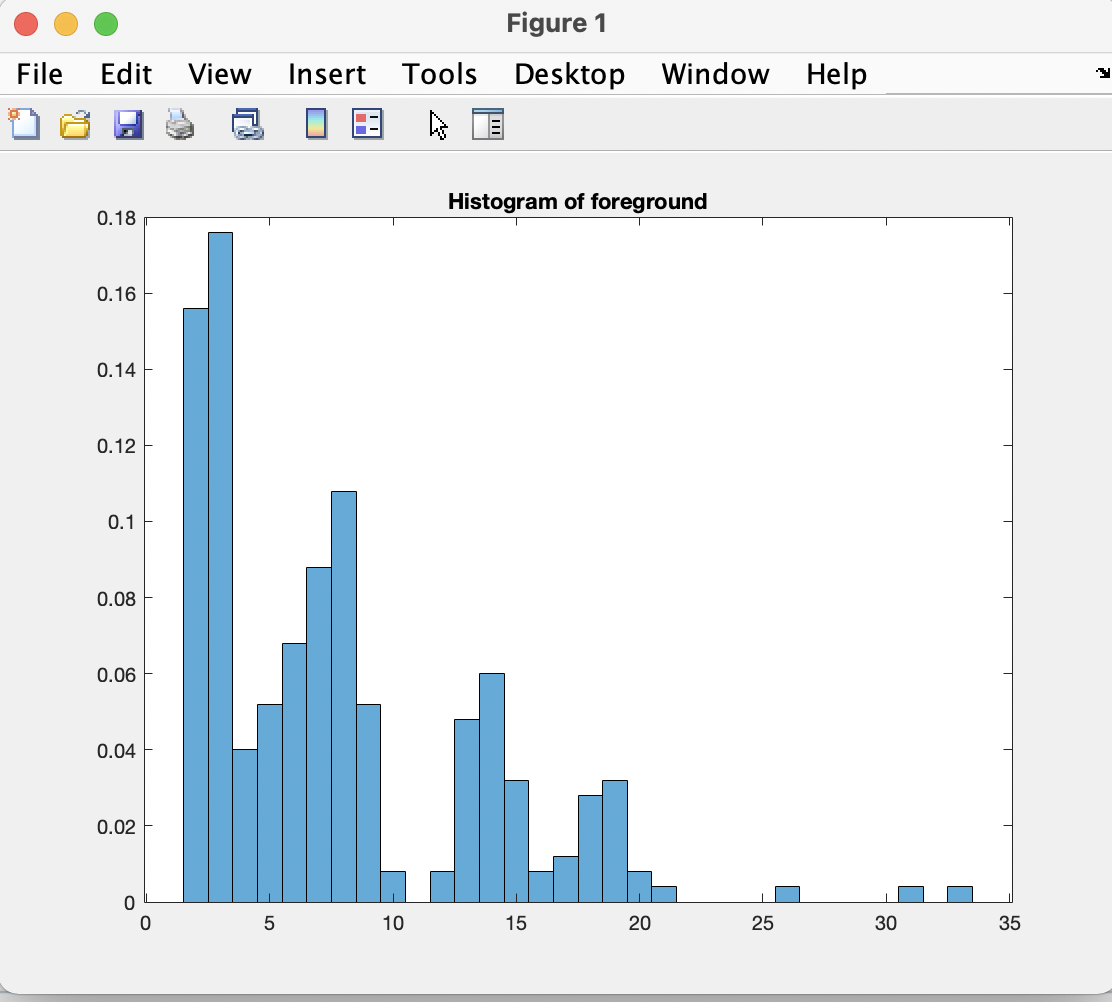

<div style="page-break-after: always;"></div>

### Histogram of $P_{X|Y}$(x|grass):
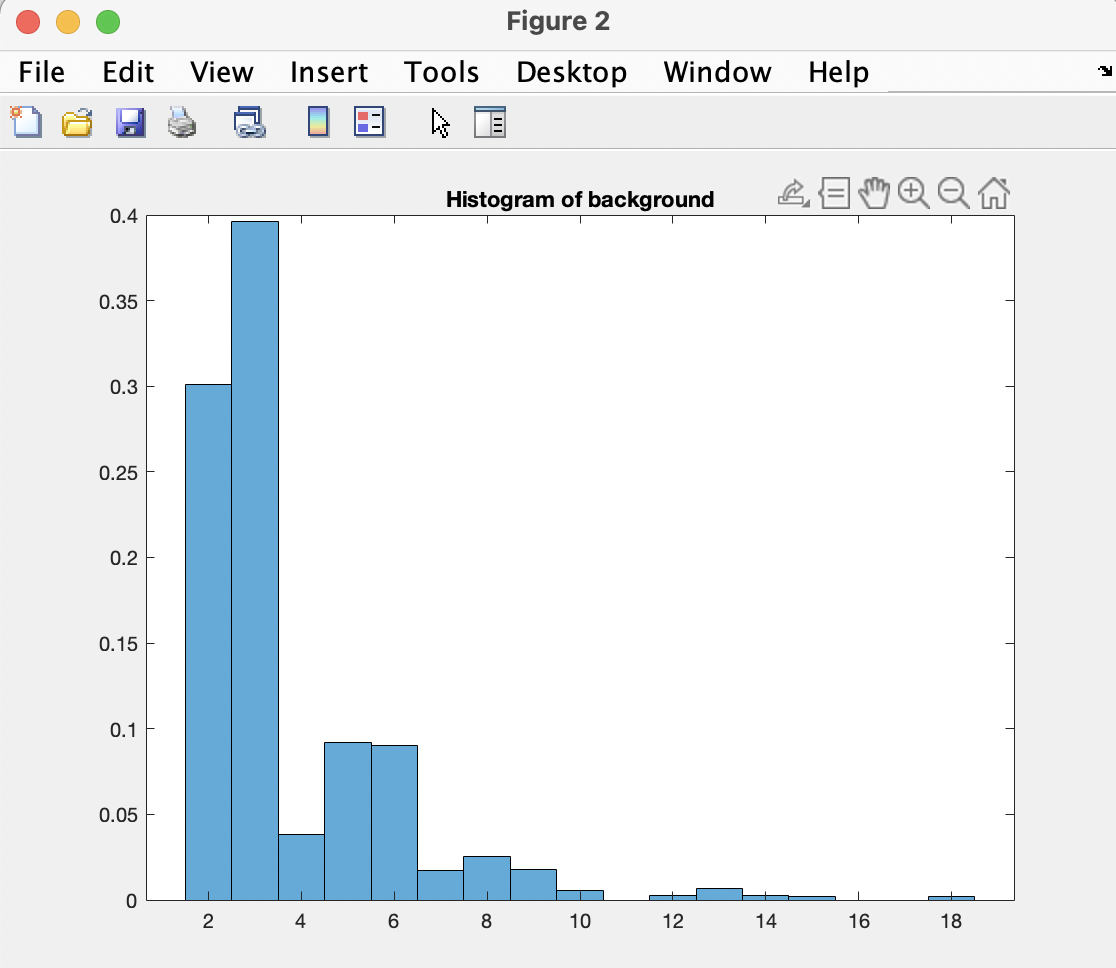

<div style="page-break-after: always;"></div>

### Matlab code snippet:

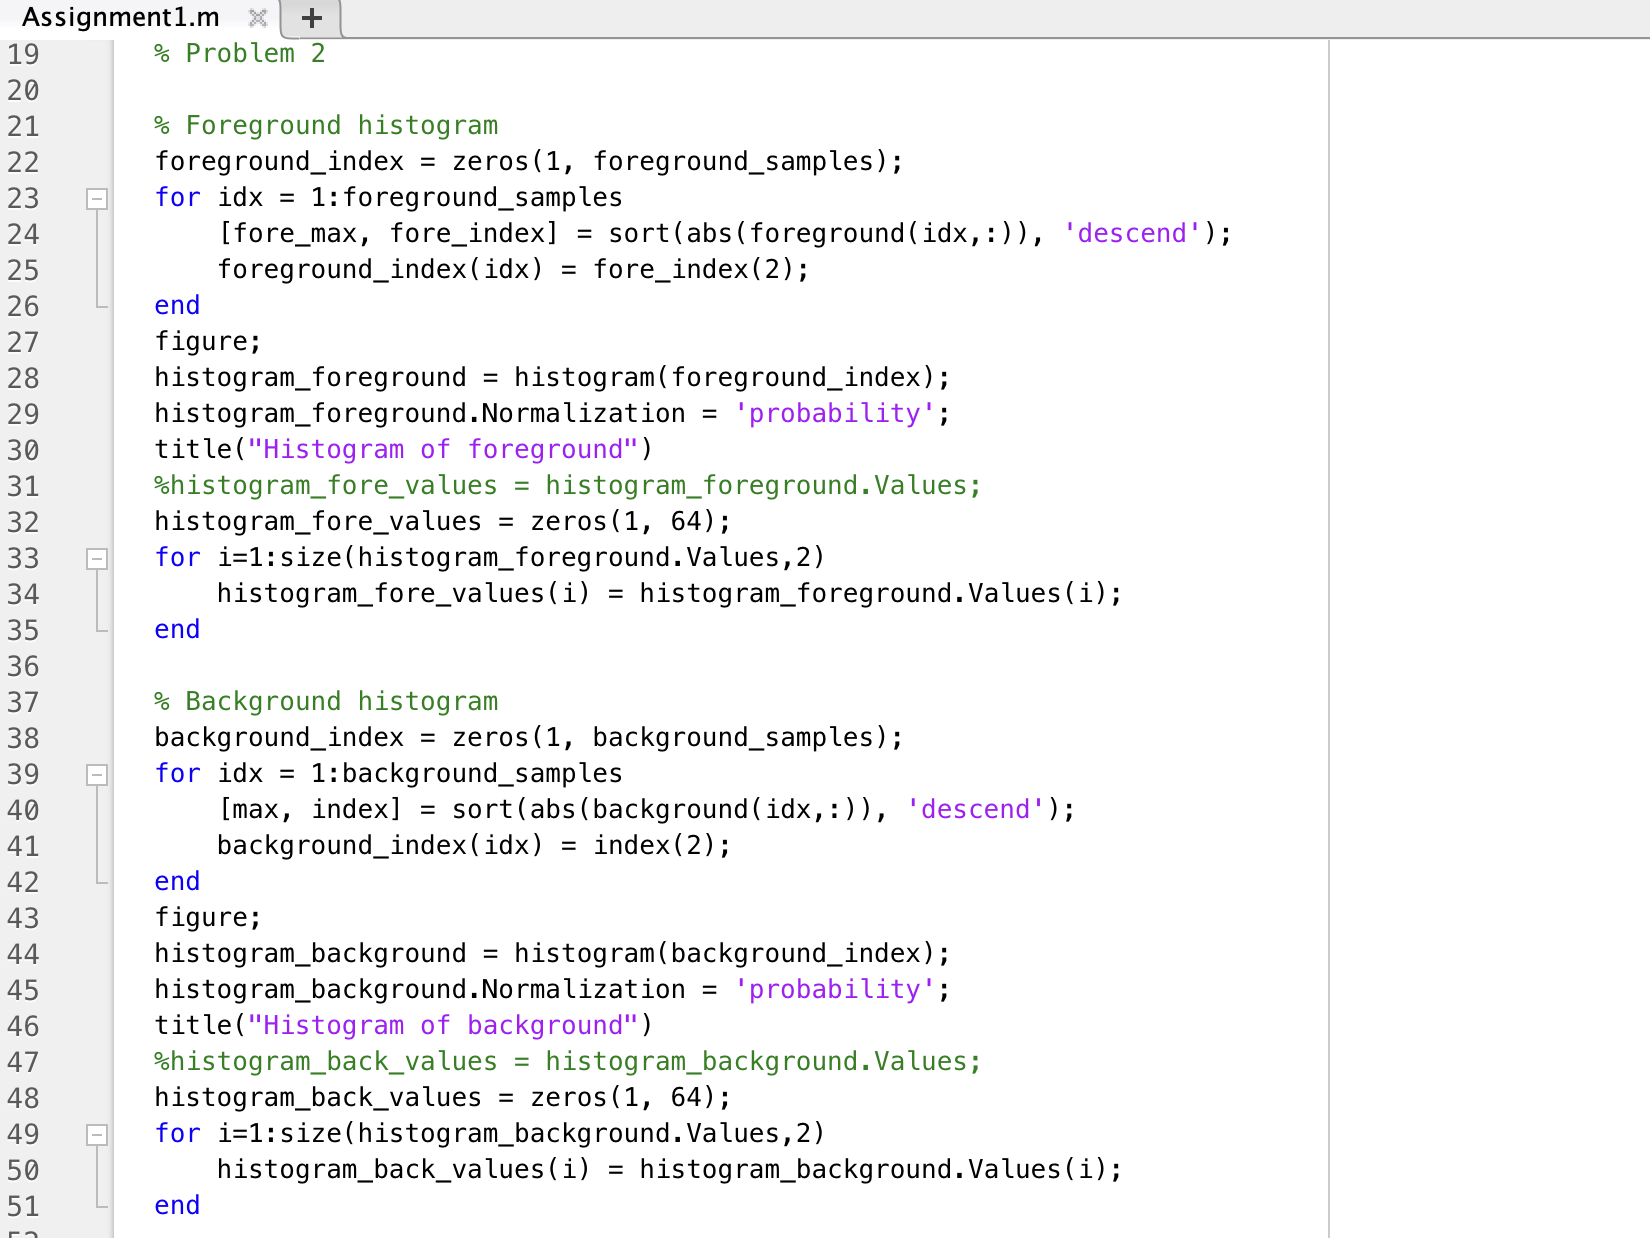


<div style="page-break-after: always;"></div>

# c)

Question: For each block in the image cheetah.bmp, compute the feature X (index of the DCT coefficient with 2nd greatest energy). Compute the state variable Y using the minimum probability of error rule based on the probabilities obtained in a) and b). Store the state in an array A. Using the commands imagesc and colormap(gray(255)) create a picture of that array.

Solution:
- Read the given image and convert it to double (DCT output may be type casted to int otherwise)
- Pad the images with 7 zeros on all 4 sides to maintain the original image size after calculation and to ensure the sliding window stays within bounds
- Pick an 8x8 block from the cheetah image and calculate the DCT of the image
- Convert the output(8x8) into zigzag format using the provided zigzag pattern file
- Convert into a vector and pick the index of the second highest value

Mask prediction:
- Calculate $P_{(Y|X)}(cheetah|x)$ and $P_{(Y|X)}(grass|x)$ by using Bayes decision rule
- Set those pixels to 1 where $P_{(Y|X)}(cheetah|x)$ > $P_{(Y|X)}(grass|x)$ and 0 everywhere else
- Display the predicted image

Note: $P_{(Y|X)}(cheetah|x)$ = $P_{X|Y}$(x|cheetah) * $P_Y$(cheetah) and
      $P_{(Y|X)}(grass|x)$ = $P_{X|Y}$(x|grass) * $P_Y$(grass)
      
Note: Array "predicted_image" in the code snippet is the final image array A

Images in the next page.

<div style="page-break-after: always;"></div>

### Predicted Image:
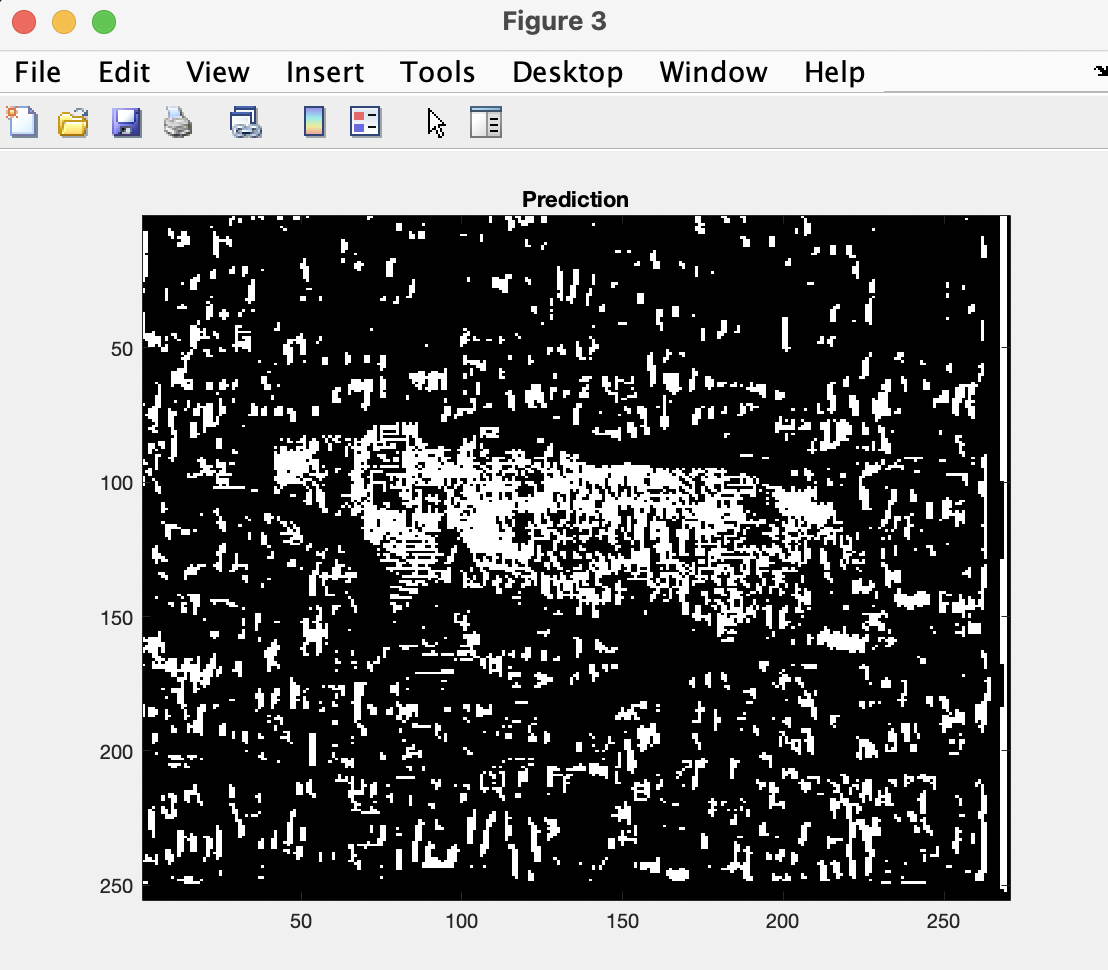

<div style="page-break-after: always;"></div>

### Matlab code snippet:
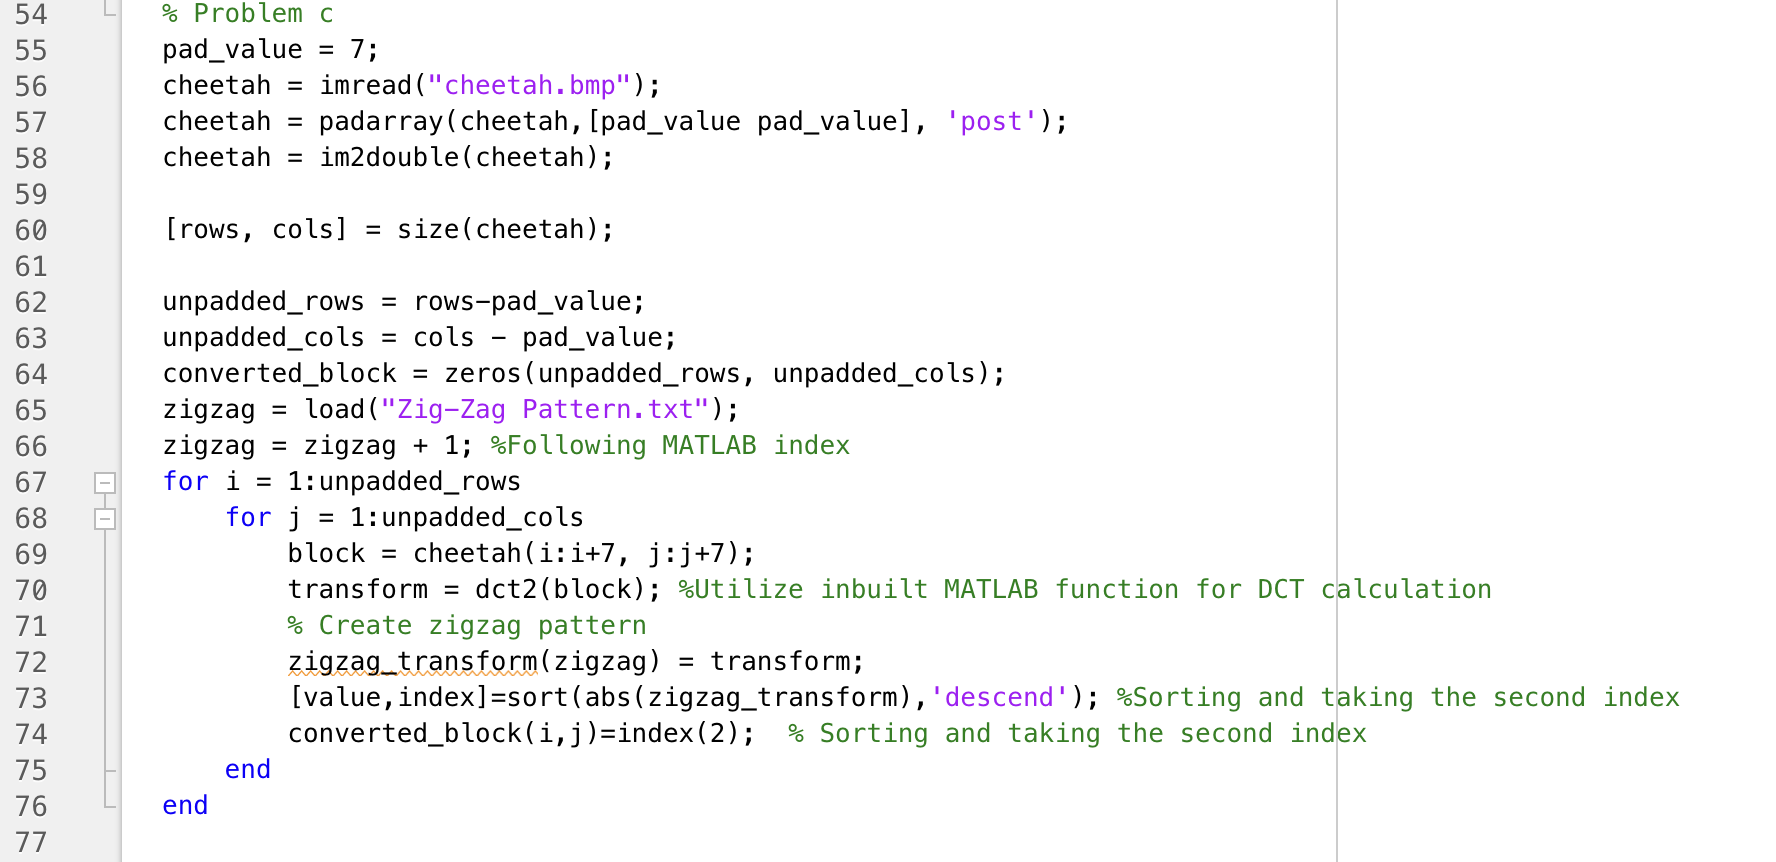
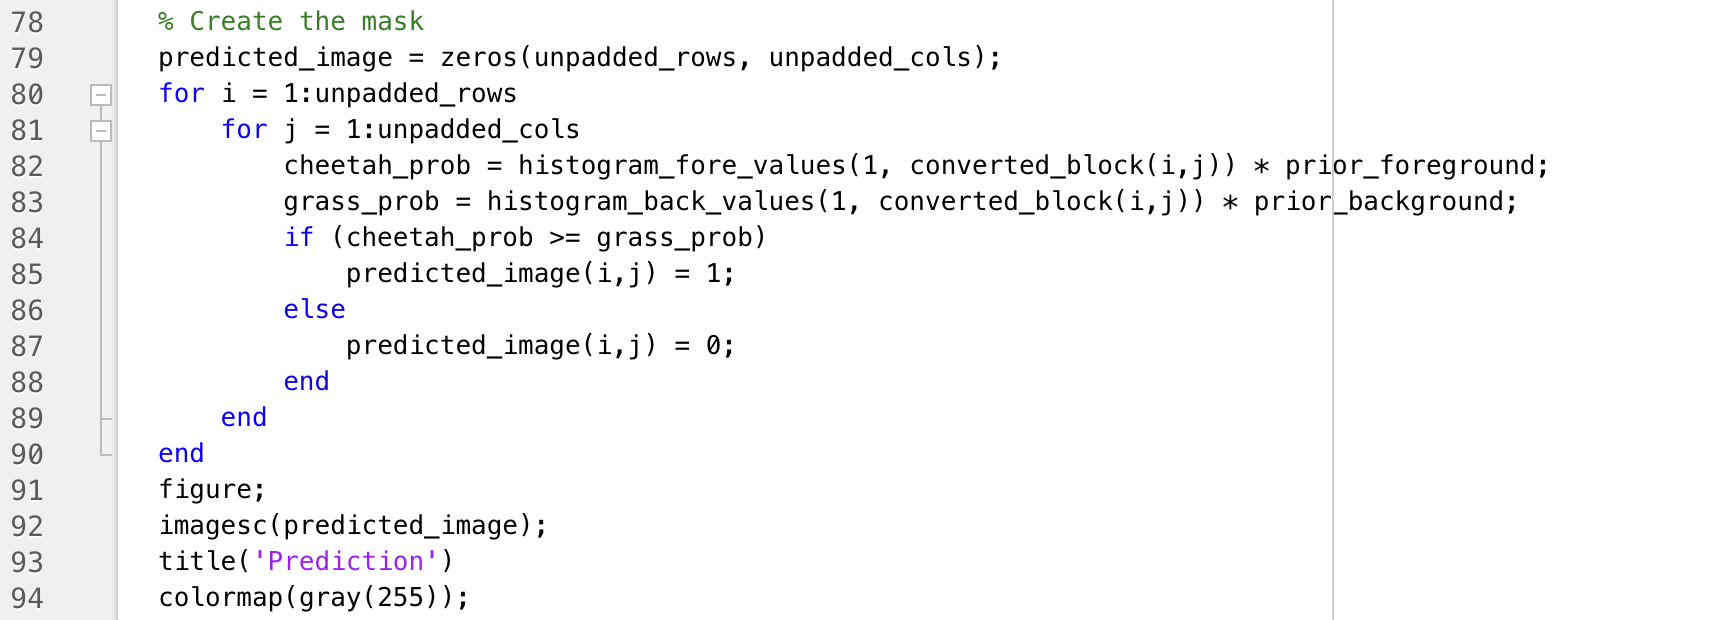

<div style="page-break-after: always;"></div>

# d)

Question: The array A contains a mask that indicates which blocks contain grass and which contain the cheetah. Compare it with the ground truth provided in image cheetah mask.bmp (shown below on the right) and compute the probability of error of your algorithm.

Solution:
- Image the ground truth image into the workspace
- Loop through all the pixels of the ground truth image and count the number of foreground and backgrond images. This will be used for percentage error calculation
- Loop through the pixels of the array A (predicted_image in the code) and compare each pixel of array A with the ground truth and calculate the number of mis-classified pixels
- Calculate foreground error as (mis-classified foreground/total foreground pixels) * prior(foreground)
- Calculate background error as (mis-classified background/total background pixels) * prior(background)
- Calculate total error as the sum of results of above 2 steps

## Computed probability of error is 22.39%

Images in the next page.

<div style="page-break-after: always;"></div>

### Matlab code snippet:
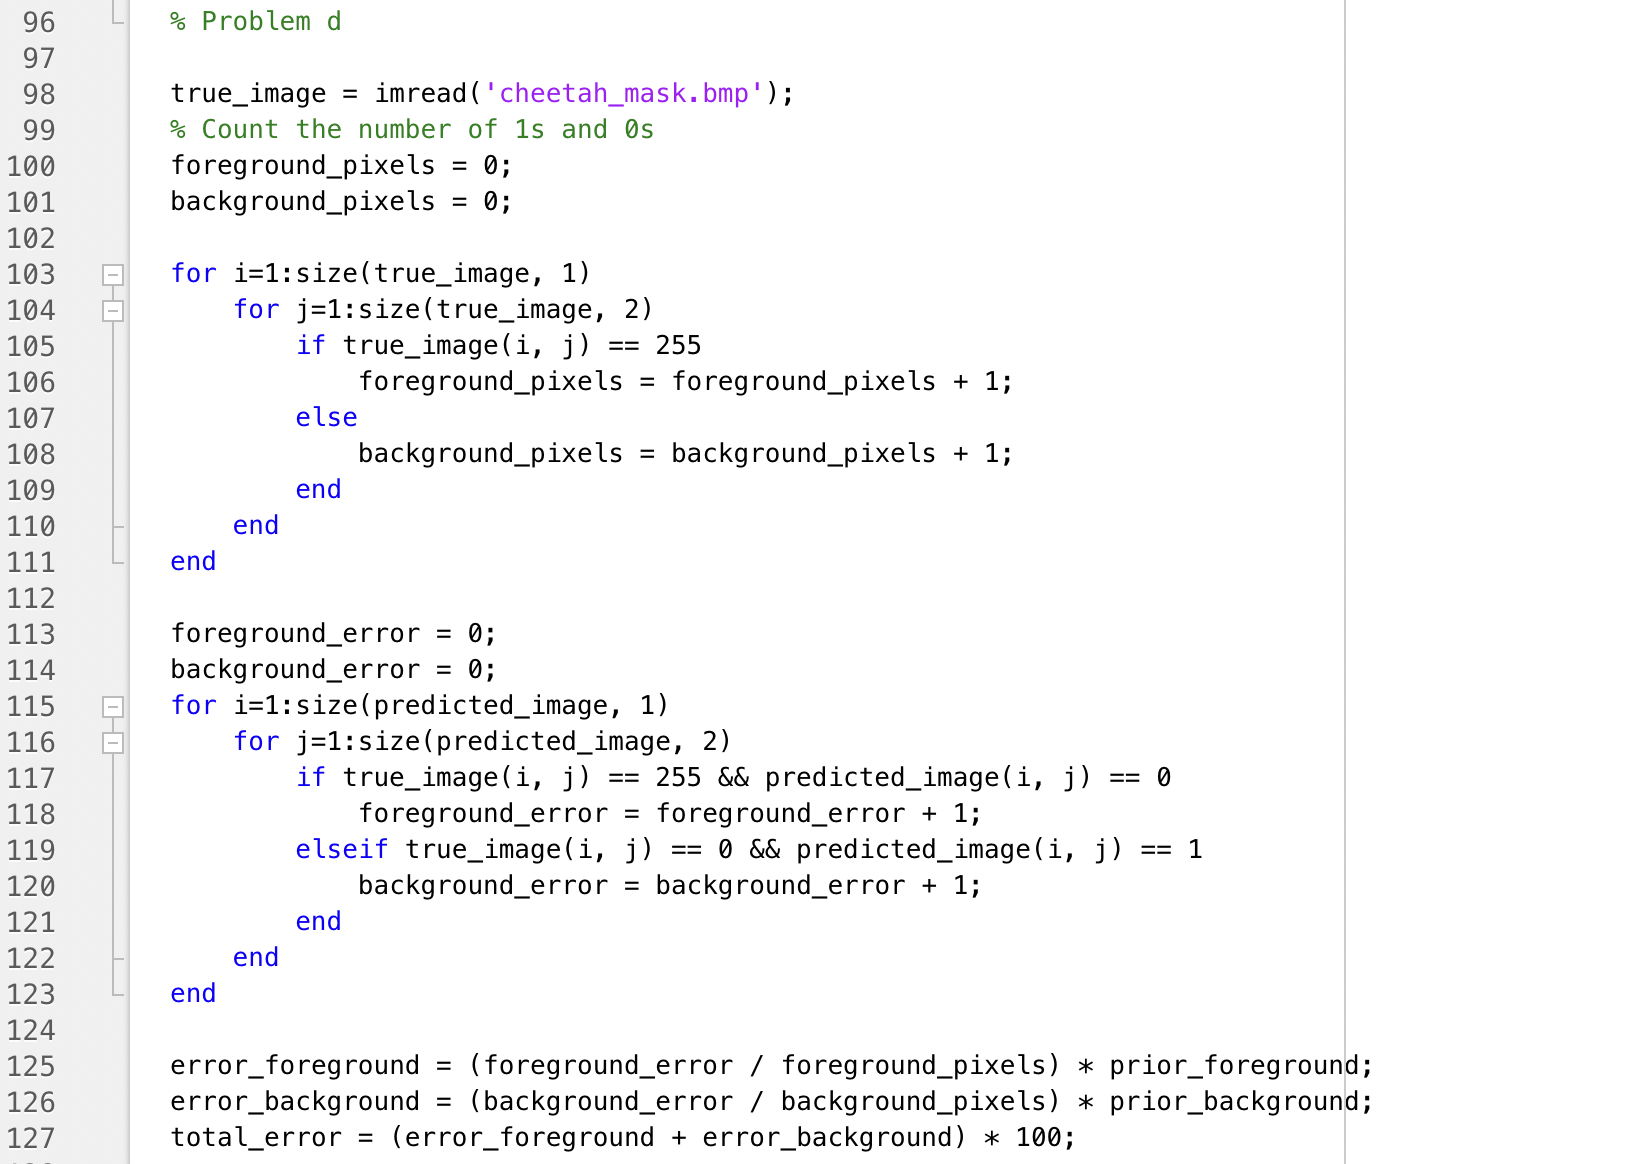

## Matlab code

Note: binwidth command was added at the end for testing, code snippets above have not been changed to avoid confusion

```

% Load training set 

TrainingSet = load("TrainingSamplesDCT_8.mat");
foreground = TrainingSet.TrainsampleDCT_FG;
background = TrainingSet.TrainsampleDCT_BG;

% ---------------------------------------------------------------------- %

% Problem a
foreground_samples = size(foreground, 1); % Calculating the number of foreground sampples
background_samples = size(background, 1); % Calculating the number of background samples

prior_foreground = foreground_samples/(foreground_samples+background_samples);
prior_background = background_samples/(foreground_samples+background_samples);

% ---------------------------------------------------------------------- %

% Problem b
binwidth = 1;
% Foreground histogram
foreground_index = zeros(1, foreground_samples);
for idx = 1:foreground_samples
    [fore_max, fore_index] = sort(abs(foreground(idx,:)), 'descend');
    foreground_index(idx) = fore_index(2);
end
figure;
histogram_foreground = histogram(foreground_index, 'BinWidth', binwidth);
histogram_foreground.Normalization = 'probability';
title("Histogram of foreground")
%histogram_fore_values = histogram_foreground.Values;
histogram_fore_values = zeros(1, 64/binwidth);
for i=1:size(histogram_foreground.Values,2)
    histogram_fore_values(i) = histogram_foreground.Values(i);
end

% Background histogram
background_index = zeros(1, background_samples);
for idx = 1:background_samples
    [max, index] = sort(abs(background(idx,:)), 'descend');
    background_index(idx) = index(2);
end
figure;
histogram_background = histogram(background_index);
histogram_background.Normalization = 'probability';
title("Histogram of background")
%histogram_back_values = histogram_background.Values;
histogram_back_values = zeros(1, 64/binwidth);
for i=1:size(histogram_background.Values,2)
    histogram_back_values(i) = histogram_background.Values(i);
end

% ---------------------------------------------------------------------- %
% Problem c
pad_value = 7;
cheetah = imread("cheetah.bmp");
cheetah = padarray(cheetah,[pad_value pad_value], 'post');
cheetah = im2double(cheetah);

[rows, cols] = size(cheetah);

unpadded_rows = rows-pad_value;
unpadded_cols = cols - pad_value;
converted_block = zeros(unpadded_rows, unpadded_cols);
zigzag = load("Zig-Zag Pattern.txt");
zigzag = zigzag + 1; %Following MATLAB index
for i = 1:unpadded_rows
    for j = 1:unpadded_cols
        block = cheetah(i:i+7, j:j+7);
        transform = dct2(block); %Utilize inbuilt MATLAB function for DCT calculation
        % Create zigzag pattern
        zigzag_transform(zigzag) = transform;
        [value,index]=sort(abs(zigzag_transform),'descend'); %Sorting and taking the second index
        converted_block(i,j)=ceil(index(2)/binwidth);  % Sorting and taking the second index            
    end
end

% Create the mask
predicted_image = zeros(unpadded_rows, unpadded_cols);
for i = 1:unpadded_rows
    for j = 1:unpadded_cols
        cheetah_prob = histogram_fore_values(1, converted_block(i,j)) * prior_foreground;
        grass_prob = histogram_back_values(1, converted_block(i,j)) * prior_background;
        if (cheetah_prob >= grass_prob) 
            predicted_image(i,j) = 1;
        else
            predicted_image(i,j) = 0;
        end
    end
end
figure;
imagesc(predicted_image);
title('Prediction')
colormap(gray(255));
% --------------------------------------------------------------------- %
% Problem d

true_image = imread('cheetah_mask.bmp');
% Count the number of 1s and 0s
foreground_pixels = 0;
background_pixels = 0;

for i=1:size(true_image, 1)
    for j=1:size(true_image, 2)
        if true_image(i, j) == 255
            foreground_pixels = foreground_pixels + 1;
        else
            background_pixels = background_pixels + 1;
        end
    end
end

foreground_error = 0;
background_error = 0;
for i=1:size(predicted_image, 1)
    for j=1:size(predicted_image, 2)
        if true_image(i, j) == 255 && predicted_image(i, j) == 0
            foreground_error = foreground_error + 1;
        elseif true_image(i, j) == 0 && predicted_image(i, j) == 1
            background_error = background_error + 1;
        end
    end
end

error_foreground = (foreground_error / foreground_pixels) * prior_foreground;
error_background = (background_error / background_pixels) * prior_background;
total_error = (error_foreground + error_background) * 100;

X = ['Probability of error is: ', num2str(total_error), '%'];
disp(X)

```
